<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Loading The Data***

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Copy of Depression and Happiness Factor Analysis.csv')

In [ ]:
df.head()

,Timestamp,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours),Unnamed: 20
0,2020/11/23 4:38:26 PM GMT+6,4th year,Very good,100,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No,8,No
1,2020/11/23 4:44:04 PM GMT+6,4th year,Very good,95,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No,8,No
2,2020/11/23 5:08:44 PM GMT+6,4th year,Very good,98,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No,8,No
3,2020/11/23 5:24:54 PM GMT+6,4th year,Very good,100,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Friends,Yes,Yes,No,No,8,No
4,2020/11/23 5:26:10 PM GMT+6,4th year,Very good,100,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Friends,Yes,Yes,No,No,8,No


In [ ]:
df.shape

(920, 21)

### ***Feature Extraction for Preparing The Data***

In [ ]:
df=df.drop(['Timestamp','Unnamed: 20'],axis=1)
df.shape

(920, 19)

In [ ]:
df=df.set_index('Which year are you in?')
df.head()

,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
Which year are you in?,,,,,,,,,,,,,,,,,,
4th year,Very good,100,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No,8
4th year,Very good,95,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No,8
4th year,Very good,98,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No,8
4th year,Very good,100,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Friends,Yes,Yes,No,No,8
4th year,Very good,100,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Friends,Yes,Yes,No,No,8


In [ ]:
df.isnull().sum()

How are you feeling right now?                                                                  0
On a scale of 1-100, how would you express this feeling?                                        0
Gender                                                                                          0
Age                                                                                             0
Your location ?                                                                                 0
Relationship status                                                                             0
Are you happy with your financial state?                                                        0
How much have you succeeded to cope up with the environment of your educational institution?    0
Understanding with your family members?                                                         0
Are you feeling pressure in your study or work right now?                                       0
Are you satisfied wi

In [ ]:
df.head(1)

,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
Which year are you in?,,,,,,,,,,,,,,,,,,
4th year,Very good,100,Male,23,Home,Single,Yes,3,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No,8


In [ ]:
df.shape

(920, 18)

In [ ]:
df_numeric=df.drop(df.iloc[:, [0,2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
df_numeric.head(1)

,"On a scale of 1-100, how would you express this feeling?",Age,How much have you succeeded to cope up with the environment of your educational institution?,How long did you sleep last night?(in hours)
Which year are you in?,,,,
4th year,100,23,3,8


In [ ]:
df_non_numeric=df.drop(df.iloc[:, [1,3,7,17]],axis=1)
df_non_numeric.head(1)

,How are you feeling right now?,Gender,Your location ?,Relationship status,Are you happy with your financial state?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?"
Which year are you in?,,,,,,,,,,,,,,
4th year,Very good,Male,Home,Single,Yes,Good,Not applicable,No,Yes,Family,Yes,Yes,No,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
encode=df_non_numeric.apply(le.fit_transform)
encode.head()

,How are you feeling right now?,Gender,Your location ?,Relationship status,Are you happy with your financial state?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?"
Which year are you in?,,,,,,,,,,,,,,
4th year,4,0,2,0,0,0,1,0,2,0,1,2,0,0
4th year,4,0,2,0,0,0,1,0,2,0,1,2,0,0
4th year,4,0,2,0,0,0,1,0,2,0,1,2,0,0
4th year,4,0,2,0,0,0,1,0,2,1,1,2,0,0
4th year,4,0,2,0,0,0,1,0,2,1,1,2,0,0


In [ ]:
df_final=pd.concat([encode,df_numeric],axis=1)
df_final.head(3)

,How are you feeling right now?,Gender,Your location ?,Relationship status,Are you happy with your financial state?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?","On a scale of 1-100, how would you express this feeling?",Age,How much have you succeeded to cope up with the environment of your educational institution?,How long did you sleep last night?(in hours)
Which year are you in?,,,,,,,,,,,,,,,,,,
4th year,4,0,2,0,0,0,1,0,2,0,1,2,0,0,100,23,3,8
4th year,4,0,2,0,0,0,1,0,2,0,1,2,0,0,95,23,3,8
4th year,4,0,2,0,0,0,1,0,2,0,1,2,0,0,98,23,3,8


In [ ]:
df_final.shape

(920, 18)

### ***Feature Selection***

In [ ]:
X=df_final.drop('How are you feeling right now?',axis=1)
y=df_final['How are you feeling right now?']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
importance=mutual_info_regression(X,y)

In [ ]:
feat_imp=pd.Series(importance,df_final.columns[0:len(df_final.columns)-1])

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

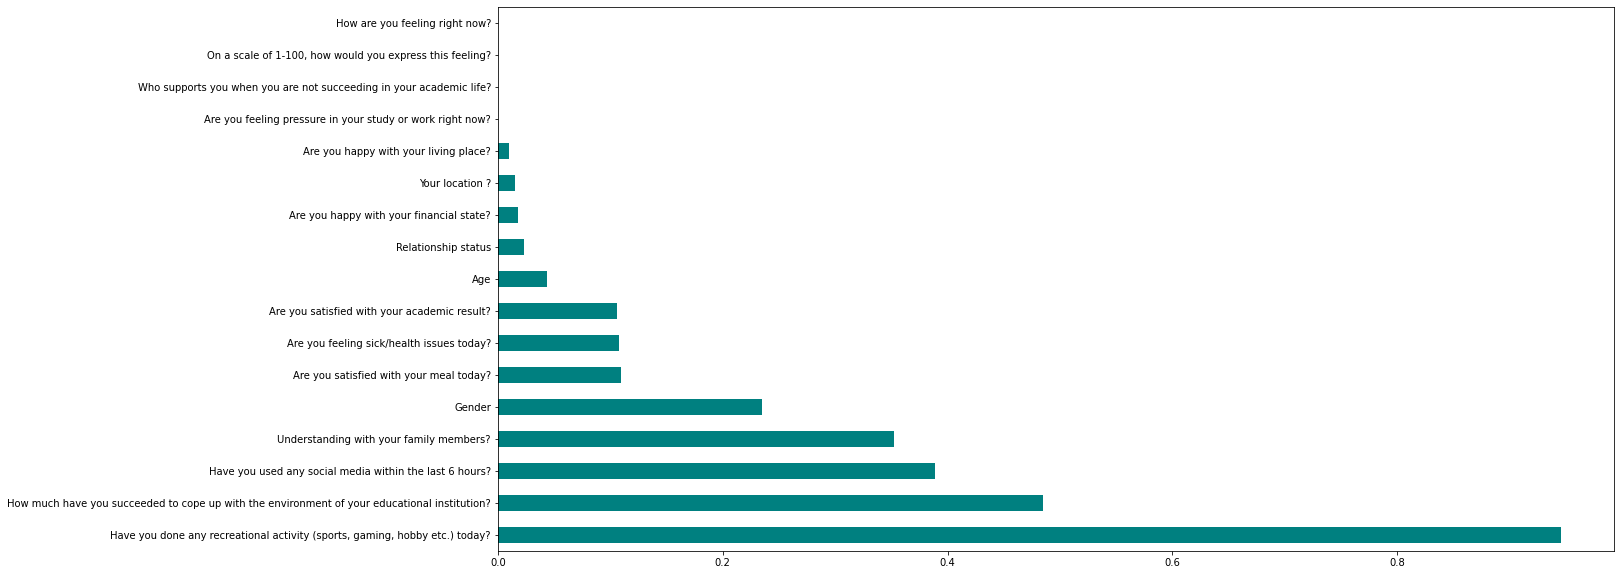

In [ ]:
feat_imp.sort_values(ascending=False).plot(kind='barh',color='teal',figsize=(20,10))
plt.show()

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
selection=SelectPercentile(mutual_info_regression,percentile=30)

In [ ]:
selection.fit(X,y)

SelectPercentile(percentile=30,
                 score_func=<function mutual_info_regression at 0x7febb1bf19d8>)

In [ ]:
X.columns[selection.get_support()]

Index(['Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'On a scale of 1-100, how would you express this feeling?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

### ***Regresson Models***

Here I have used: 

*   Linear Regression (Multiple)
*   Decision Tree Regressor
*   Lasso
*   Ridge
*   Polynominal Regression
*   Random Forest Regressor



In [ ]:
X_new=df_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','On a scale of 1-100, how would you express this feeling?','How long did you sleep last night?(in hours)']]
y_new=df_final[['How are you feeling right now?']]

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

***Multiple Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=10)

In [ ]:
cv=KFold(n_splits=10,shuffle=True,random_state=10)

In [ ]:
lin=LinearRegression()

In [ ]:
mse_cv=-cross_val_score(lin,X_train,y_train,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train=lin.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report

In [ ]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_train

1.4310469531377132

In [ ]:
y_pred_test=lin.predict(X_test)

In [ ]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_test

1.5311010333011388

In [ ]:
mse_cv.mean()

1.457810893201323

In [ ]:
lin.score(X_test,y_test)

0.2108490784562643

In [ ]:
accuracy_score(y_test,y_pred_test.round())

0.13043478260869565

In [ ]:
print(confusion_matrix(y_test,y_pred_test.round()))

[[ 0 14 17  2  0]
 [ 0  7 20 13  1]
 [ 0 22 16  2  0]
 [ 0 10 20  1  1]
 [ 0  0  3 35  0]]


In [ ]:
print(classification_report(y_test,y_pred_test.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.13      0.17      0.15        41
           2       0.21      0.40      0.28        40
           3       0.02      0.03      0.02        32
           4       0.00      0.00      0.00        38

    accuracy                           0.13       184
   macro avg       0.07      0.12      0.09       184
weighted avg       0.08      0.13      0.10       184



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_train,y_pred_train.round())

0.14402173913043478

In [ ]:
print(confusion_matrix(y_train,y_pred_train.round()))

[[  0  62  67   4   0]
 [  0  29  76  50   1]
 [  0  61  63  13   1]
 [  1  38  81  10   0]
 [  0   0  13 162   4]]


In [ ]:
print(classification_report(y_train,y_pred_train.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.15      0.19      0.17       156
           2       0.21      0.46      0.29       138
           3       0.04      0.08      0.05       130
           4       0.67      0.02      0.04       179

    accuracy                           0.14       736
   macro avg       0.21      0.15      0.11       736
weighted avg       0.24      0.14      0.11       736



***Decision Tree Regressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.17)

In [ ]:
cv_r=KFold(n_splits=10,shuffle=True)

In [ ]:
cv_mse=-cross_val_score(dt_reg,X_train,y_train,cv=cv_r,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.17, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_dt_reg_train=dt_reg.predict(X_train)

In [ ]:
train_mse=mean_squared_error(y_train,y_pred_dt_reg_train)
train_mse

0.1368040304006844

In [ ]:
y_pred_dt_reg_test=dt_reg.predict(X_test)

In [ ]:
test_mse=mean_squared_error(y_test,y_pred_dt_reg_test)
test_mse

0.15248375507914633

In [ ]:
cv_mse.mean()

0.13518999065524212

In [ ]:
dt_reg.score(X_test,y_test)

0.9214077365086002

In [ ]:
accuracy_score(y_test,y_pred_dt_reg_test.round())

0.8260869565217391

In [ ]:
print(confusion_matrix(y_test,y_pred_dt_reg_test.round()))

[[32  0  0  1  0]
 [ 0 22 19  0  0]
 [ 0 12 28  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 38]]


In [ ]:
print(classification_report(y_test,y_pred_dt_reg_test.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.65      0.54      0.59        41
           2       0.60      0.70      0.64        40
           3       0.97      1.00      0.98        32
           4       1.00      1.00      1.00        38

    accuracy                           0.83       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
accuracy_score(y_train,y_pred_dt_reg_train.round())

0.8478260869565217

In [ ]:
print(confusion_matrix(y_train,y_pred_dt_reg_train.round()))

[[132   0   0   1   0]
 [  0  89  66   0   1]
 [  2  40  96   0   0]
 [  0   0   0 130   0]
 [  0   1   0   1 177]]


In [ ]:
print(classification_report(y_train,y_pred_dt_reg_train.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       133
           1       0.68      0.57      0.62       156
           2       0.59      0.70      0.64       138
           3       0.98      1.00      0.99       130
           4       0.99      0.99      0.99       179

    accuracy                           0.85       736
   macro avg       0.85      0.85      0.85       736
weighted avg       0.85      0.85      0.85       736



***Lasso***

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
las=Lasso(alpha=0.4,normalize=True)

In [ ]:
cv_lasso=KFold(n_splits=10,shuffle=True)

In [ ]:
cv_lasso_mse=-cross_val_score(las,X_train,y_train,scoring='neg_mean_squared_error',cv=cv_lasso,n_jobs=-1)

In [ ]:
las.fit(X_train,y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
y_pred_lasso_train=las.predict(X_train)

In [ ]:
mse_lass_train=mean_squared_error(y_train,y_pred_lasso_train)
mse_lass_train

2.0761977197542536

In [ ]:
y_pred_lasso_test=las.predict(X_test)

In [ ]:
mse_lass_test=mean_squared_error(y_test,y_pred_lasso_test)
mse_lass_test

1.947284085538752

In [ ]:
cv_lasso_mse.mean()

2.0896918789088916

In [ ]:
las.score(X_test,y_test)

-0.0036574969171983

In [ ]:
accuracy_score(y_test,y_pred_lasso_test.round())

0.21739130434782608

In [ ]:
print(confusion_matrix(y_test,y_pred_lasso_test.round()))

[[ 0  0 33  0  0]
 [ 0  0 41  0  0]
 [ 0  0 40  0  0]
 [ 0  0 32  0  0]
 [ 0  0 38  0  0]]


In [ ]:
print(classification_report(y_test,y_pred_lasso_test.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        41
           2       0.22      1.00      0.36        40
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        38

    accuracy                           0.22       184
   macro avg       0.04      0.20      0.07       184
weighted avg       0.05      0.22      0.08       184



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_train,y_pred_lasso_train.round())

0.1875

In [ ]:
print(confusion_matrix(y_train,y_pred_lasso_train.round()))

[[  0   0 133   0   0]
 [  0   0 156   0   0]
 [  0   0 138   0   0]
 [  0   0 130   0   0]
 [  0   0 179   0   0]]


In [ ]:
print(classification_report(y_train,y_pred_lasso_train.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00       156
           2       0.19      1.00      0.32       138
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00       179

    accuracy                           0.19       736
   macro avg       0.04      0.20      0.06       736
weighted avg       0.04      0.19      0.06       736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Ridge***

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rid=Ridge(normalize=True)

In [ ]:
cv_ridge=KFold(n_splits=10,shuffle=True)

In [ ]:
cv_ridge_mse=-cross_val_score(rid,X_train,y_train,cv=cv_ridge,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
rid.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred_ridge_train=rid.predict(X_train)

In [ ]:
mse_ridge_train=mean_squared_error(y_train,y_pred_ridge_train)
mse_ridge_train

1.5756388216723167

In [ ]:
y_pred_ridge_test=rid.predict(X_test)

In [ ]:
mse_ridge_test=mean_squared_error(y_test,y_pred_ridge_test)
mse_ridge_test

1.5391747278333017

In [ ]:
cv_ridge_mse.mean()

1.594518786915327

In [ ]:
rid.score(X_test,y_test)

0.20668778319112968

In [ ]:
accuracy_score(y_test,y_pred_ridge_test.round())

0.21739130434782608

In [ ]:
print(confusion_matrix(y_test,y_pred_ridge_test.round()))

[[ 0  4 29  0  0]
 [ 0  1 26 14  0]
 [ 0  0 39  1  0]
 [ 0  4 28  0  0]
 [ 0  0  3 35  0]]


In [ ]:
print(classification_report(y_test,y_pred_ridge_test.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.11      0.02      0.04        41
           2       0.31      0.97      0.47        40
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        38

    accuracy                           0.22       184
   macro avg       0.08      0.20      0.10       184
weighted avg       0.09      0.22      0.11       184



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_train,y_pred_ridge_train.round())

0.18070652173913043

In [ ]:
print(confusion_matrix(y_train,y_pred_ridge_train.round()))

[[  0   7 126   0   0]
 [  0   0 112  44   0]
 [  0   2 133   3   0]
 [  0  21 109   0   0]
 [  0   0  14 165   0]]


In [ ]:
print(classification_report(y_train,y_pred_ridge_train.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00       156
           2       0.27      0.96      0.42       138
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00       179

    accuracy                           0.18       736
   macro avg       0.05      0.19      0.08       736
weighted avg       0.05      0.18      0.08       736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Polynominal Regression***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pol=PolynomialFeatures(degree=3)

In [ ]:
X_train_poly=pol.fit_transform(X_train)
X_test_poly=pol.fit_transform(X_test)

In [ ]:
pol_reg=LinearRegression()

In [ ]:
cv_pol=KFold(n_splits=10,shuffle=True)

In [ ]:
mse_cv_pol=-cross_val_score(pol_reg,X_train_poly,y_train,cv=cv_pol,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
pol_reg.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_pol_reg_train=pol_reg.predict(X_train_poly)

In [ ]:
mse_pol_reg_train=mean_squared_error(y_train,y_pred_pol_reg_train)
mse_pol_reg_train

0.2887972632066498

In [ ]:
y_pred_pol_reg_test=pol_reg.predict(X_test_poly)

In [ ]:
mse_pol_reg_test=mean_squared_error(y_test,y_pred_pol_reg_test)
mse_pol_reg_test

0.37791992946383857

In [ ]:
mse_cv_pol.mean()

0.5032259955660906

In [ ]:
pol_reg.score(X_test_poly,y_test)

0.8052147741268787

In [ ]:
accuracy_score(y_test,y_pred_pol_reg_test.round())

0.6739130434782609

In [ ]:
print(confusion_matrix(y_test,y_pred_pol_reg_test.round()))

[[30  3  0  0  0]
 [ 0 20 18  3  0]
 [ 2 29  8  1  0]
 [ 0  0  2 30  0]
 [ 0  0  1  1 36]]


In [ ]:
print(classification_report(y_test,y_pred_pol_reg_test.round()))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.38      0.49      0.43        41
           2       0.28      0.20      0.23        40
           3       0.86      0.94      0.90        32
           4       1.00      0.95      0.97        38

    accuracy                           0.67       184
   macro avg       0.69      0.70      0.69       184
weighted avg       0.67      0.67      0.67       184



In [ ]:
accuracy_score(y_train,y_pred_pol_reg_train.round())

0.7364130434782609

In [ ]:
print(confusion_matrix(y_train,y_pred_pol_reg_train.round()))

[[121  11   1   0   0]
 [  0  81  70   5   0]
 [  7  75  49   7   0]
 [  0   0   2 124   4]
 [  0   1   4   7 167]]


In [ ]:
print(classification_report(y_train,y_pred_pol_reg_train.round()))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       133
           1       0.48      0.52      0.50       156
           2       0.39      0.36      0.37       138
           3       0.87      0.95      0.91       130
           4       0.98      0.93      0.95       179

    accuracy                           0.74       736
   macro avg       0.73      0.73      0.73       736
weighted avg       0.74      0.74      0.74       736



***Random Forest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg=RandomForestRegressor(max_depth=3,oob_score=True,n_jobs=-1,min_samples_leaf=0.1)

In [ ]:
cv_rf_reg=KFold(n_splits=10,shuffle=True)

In [ ]:
mse_cv_rf_reg=-cross_val_score(rf_reg,X_train,y_train,cv=cv_rf_reg,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
rf_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.05,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rf_reg_train=rf_reg.predict(X_train)

In [ ]:
mse_rf_reg_train=mean_squared_error(y_train,y_pred_rf_reg_train)
mse_rf_reg_train

0.14336848858016668

In [ ]:
y_pred_rf_reg_test=rf_reg.predict(X_test)

In [ ]:
mse_rf_reg_test=mean_squared_error(y_test,y_pred_rf_reg_test)
mse_rf_reg_test

0.12851449518681873

In [ ]:
mse_cv_rf_reg.mean()

0.14506639935226523

In [ ]:
rf_reg.score(X_test,y_test)

0.9337618288391167

In [ ]:
accuracy_score(y_test,y_pred_rf_reg_test.round())

0.7771739130434783

In [ ]:
print(confusion_matrix(y_test,y_pred_rf_reg_test.round()))

[[32  0  1  0  0]
 [ 0 41  0  0  0]
 [ 0 40  0  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 38]]


In [ ]:
print(classification_report(y_test,y_pred_rf_reg_test.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.51      1.00      0.67        41
           2       0.00      0.00      0.00        40
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        38

    accuracy                           0.78       184
   macro avg       0.70      0.79      0.73       184
weighted avg       0.67      0.78      0.71       184



In [ ]:
accuracy_score(y_train,y_pred_rf_reg_train.round())

0.8070652173913043

In [ ]:
print(confusion_matrix(y_train,y_pred_rf_reg_train.round()))

[[132   0   0   1   0]
 [  0 155   0   0   1]
 [  2 136   0   0   0]
 [  0   0   0 130   0]
 [  0   1   0   1 177]]


In [ ]:
print(classification_report(y_train,y_pred_rf_reg_train.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       133
           1       0.53      0.99      0.69       156
           2       0.00      0.00      0.00       138
           3       0.98      1.00      0.99       130
           4       0.99      0.99      0.99       179

    accuracy                           0.81       736
   macro avg       0.70      0.79      0.73       736
weighted avg       0.71      0.81      0.74       736



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ***Summary***

In [ ]:
summary={
    'Algorithm Name':['Multiple Linear Regresson','Decision Tree Regressor','Lasso','Ridge','Polynominal Regression','Random Forest Regressor'],
    'Train Accuracy':[0.14,0.85,0.19,0.18,0.74,0.81],
    'Test Accuracy':[0.13,0.83,0.22,0.22,0.67,0.78]
}

df_summary=pd.DataFrame(summary,index=['Model:1','Model:2','Model:3','Model:4','Model:5','Model:6'])
print("So the summary of my regression analysis is:\n")
print(df_summary)

So the summary of my regression analysis is:

                    Algorithm Name  Train Accuracy  Test Accuracy
Model:1  Multiple Linear Regresson            0.14           0.13
Model:2    Decision Tree Regressor            0.85           0.83
Model:3                      Lasso            0.19           0.22
Model:4                      Ridge            0.18           0.22
Model:5     Polynominal Regression            0.74           0.67
Model:6    Random Forest Regressor            0.81           0.78


So best 3 algorithms are: **Model:2** *>* **Model:6** *>* **Model:5**